<a href="https://colab.research.google.com/github/fbildirici/GameTheoryImplicationsinSoftwareDevelopment/blob/main/yalinsound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print(df.columns.tolist())


['filename', 'analysis_status', 'tempo', 'tempo_std', 'beats_count', 'onset_count', 'onset_strength_mean', 'onset_strength_std', 'rms_mean', 'rms_std', 'rms_max', 'rms_min', 'zcr_mean', 'zcr_std', 'spectral_centroid_mean', 'spectral_centroid_std', 'spectral_bandwidth_mean', 'spectral_bandwidth_std', 'spectral_contrast_mean', 'spectral_contrast_std', 'spectral_rolloff_mean', 'spectral_rolloff_std', 'spectral_flatness_mean', 'spectral_flatness_std', 'mfcc1_mean', 'mfcc1_std', 'mfcc2_mean', 'mfcc2_std', 'mfcc3_mean', 'mfcc3_std', 'mfcc4_mean', 'mfcc4_std', 'mfcc5_mean', 'mfcc5_std', 'mfcc6_mean', 'mfcc6_std', 'mfcc7_mean', 'mfcc7_std', 'mfcc8_mean', 'mfcc8_std', 'mfcc9_mean', 'mfcc9_std', 'mfcc10_mean', 'mfcc10_std', 'mfcc11_mean', 'mfcc11_std', 'mfcc12_mean', 'mfcc12_std', 'mfcc13_mean', 'mfcc13_std', 'mfcc14_mean', 'mfcc14_std', 'mfcc15_mean', 'mfcc15_std', 'mfcc16_mean', 'mfcc16_std', 'mfcc17_mean', 'mfcc17_std', 'mfcc18_mean', 'mfcc18_std', 'mfcc19_mean', 'mfcc19_std', 'mfcc20_mean', 

✅ Özet istatistikler CSV olarak kaydedildi: ozet_istatistikler.csv


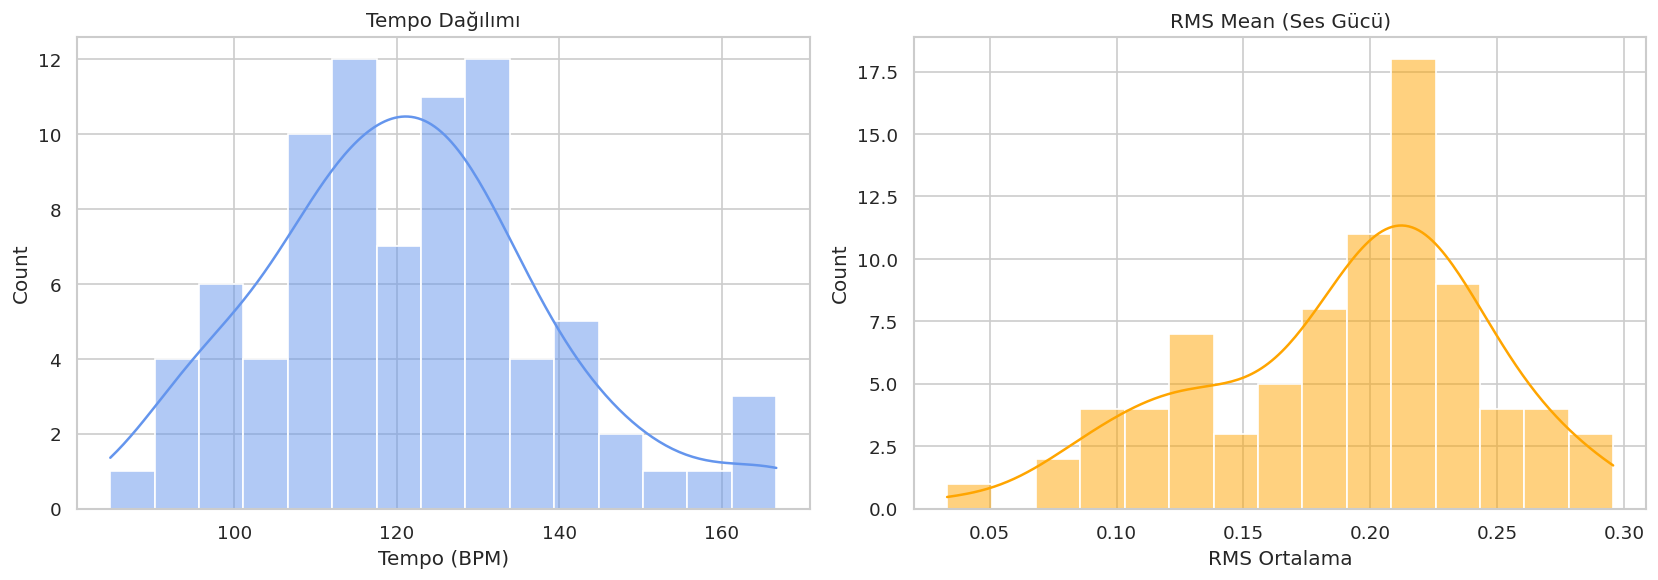

✅ Tempo ve RMS dağılım grafiği kaydedildi: tempo_ve_rms_dagilimi.png


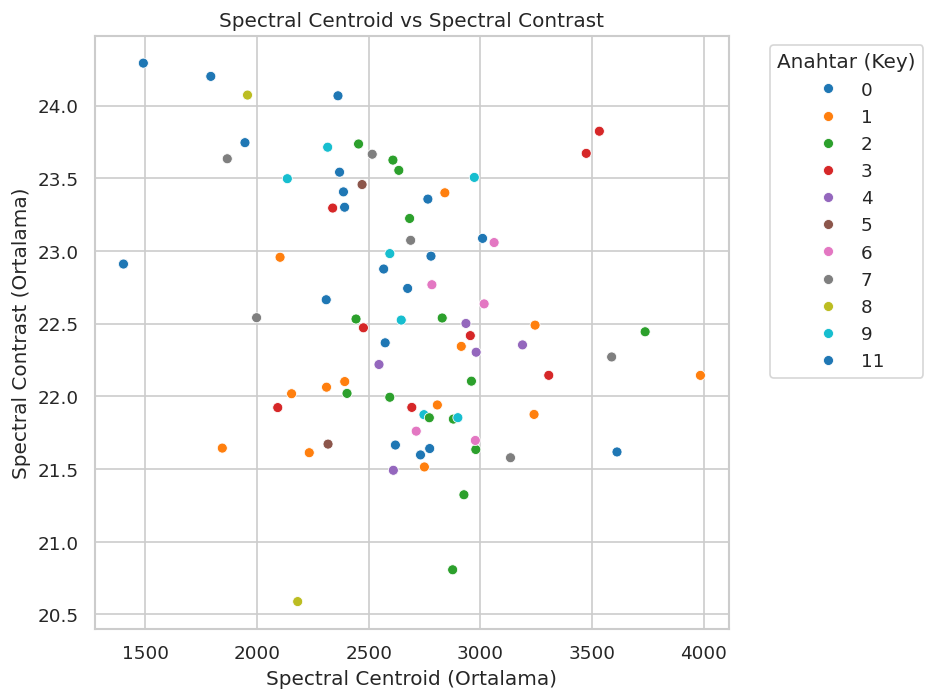

✅ Spektral karşılaştırma grafiği kaydedildi.


/tmp/ipython-input-3-4124103537.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mode_label', y='spectral_flatness_mean', palette="Set2")


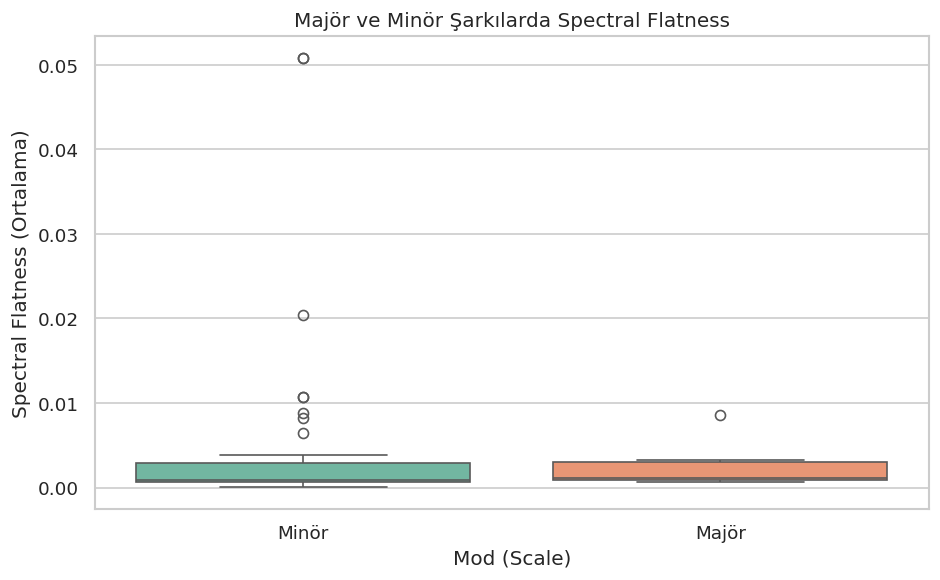

✅ Majör/Minör flatness karşılaştırma grafiği kaydedildi.
✅ Korelasyon matrisi CSV olarak kaydedildi: korelasyon_matrisi.csv


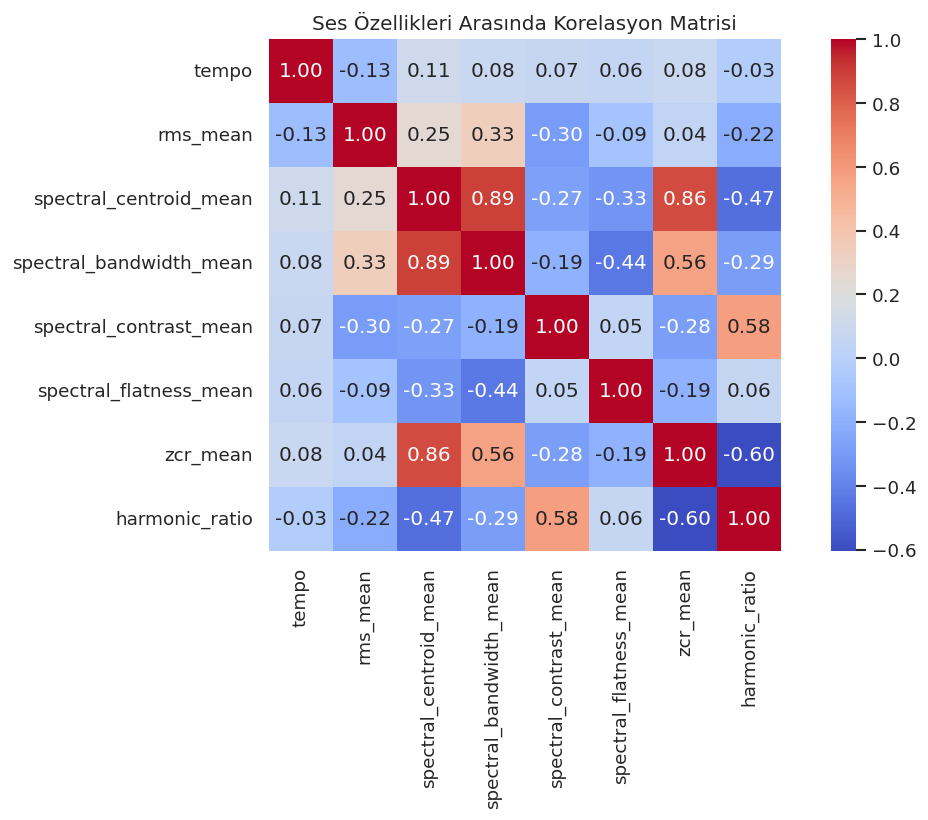

✅ Korelasyon matrisi grafiği kaydedildi.


In [3]:
# 1. GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ayarlar
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# 2. VERİYİ YÜKLE
df = pd.read_csv("/content/yalin_full_academic_audio_features2.csv")
df.columns = df.columns.str.strip()

# 3. TEMİZLİK ve DÜZEN
# Tempo sütunu bazen list gibi olabilir, düzelt
df['tempo'] = df['tempo'].apply(lambda x: float(str(x).strip("[]")) if pd.notnull(x) else np.nan)

# Bazı sayısal sütunları netleştir
for col in ['duration_sec', 'start_rms', 'end_rms', 'tempo']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. ÖZET İSTATİSTİKLER
summary_stats = df.describe().T
summary_stats.to_csv("ozet_istatistikler.csv")
print("✅ Özet istatistikler CSV olarak kaydedildi: ozet_istatistikler.csv")

# 5. TEMPO ve RMS_MEAN GRAFİĞİ
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df['tempo'], bins=15, kde=True, color="cornflowerblue")
plt.title("Tempo Dağılımı")
plt.xlabel("Tempo (BPM)")

plt.subplot(1,2,2)
sns.histplot(df['rms_mean'], bins=15, kde=True, color="orange")
plt.title("RMS Mean (Ses Gücü)")
plt.xlabel("RMS Ortalama")

plt.tight_layout()
plt.savefig("tempo_ve_rms_dagilimi.png")
plt.show()
print("✅ Tempo ve RMS dağılım grafiği kaydedildi: tempo_ve_rms_dagilimi.png")

# 6. SCATTERPLOT: Librosa Key'e Göre Spectral Karşılaştırma
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='spectral_centroid_mean', y='spectral_contrast_mean',
                hue='librosa_main_key', palette="tab10")
plt.title("Spectral Centroid vs Spectral Contrast")
plt.xlabel("Spectral Centroid (Ortalama)")
plt.ylabel("Spectral Contrast (Ortalama)")
plt.legend(title="Anahtar (Key)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("spectral_centroid_vs_contrast.png")
plt.show()
print("✅ Spektral karşılaştırma grafiği kaydedildi.")

# 7. MAJÖR / MİNÖR KARŞILAŞTIRMASI
df['mode_label'] = df['essentia_scale'].map({'major': 'Majör', 'minor': 'Minör'})

if df['mode_label'].notna().sum() > 0:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='mode_label', y='spectral_flatness_mean', palette="Set2")
    plt.title("Majör ve Minör Şarkılarda Spectral Flatness")
    plt.ylabel("Spectral Flatness (Ortalama)")
    plt.xlabel("Mod (Scale)")
    plt.tight_layout()
    plt.savefig("major_minor_flatness_boxplot.png")
    plt.show()
    print("✅ Majör/Minör flatness karşılaştırma grafiği kaydedildi.")
else:
    print("ℹ️ 'essentia_scale' sütunu uygun değil veya boş olduğu için Majör/Minör analizi atlandı.")

# 8. KORELASYON MATRİSİ (Mevcut verilerden)
selected_cols = [
    'tempo', 'rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean',
    'spectral_contrast_mean', 'spectral_flatness_mean', 'zcr_mean', 'harmonic_ratio'
]

df_corr = df[selected_cols].copy()
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
corr_matrix = df_corr.corr()
corr_matrix.to_csv("korelasyon_matrisi.csv")
print("✅ Korelasyon matrisi CSV olarak kaydedildi: korelasyon_matrisi.csv")

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Ses Özellikleri Arasında Korelasyon Matrisi")
plt.tight_layout()
plt.savefig("korelasyon_matrisi_grafik.png")
plt.show()
print("✅ Korelasyon matrisi grafiği kaydedildi.")


📈 Özet istatistikler:


,count,mean,std,min,25%,50%,75%,max
tempo,83.0,121.217958,17.368025,84.720799,109.956782,120.185320,129.199219,166.708669
rms_mean,83.0,0.190183,0.055319,0.033233,0.153307,0.202291,0.223331,0.295742
spectral_centroid_mean,83.0,2641.993968,494.416265,1402.853841,2366.261063,2674.504395,2930.841898,3984.565993
spectral_flatness_mean,83.0,0.003341,0.008097,0.000065,0.000638,0.000954,0.002936,0.050839
spectral_contrast_mean,83.0,22.569482,0.829785,20.588699,21.899412,22.490024,23.298106,24.292037


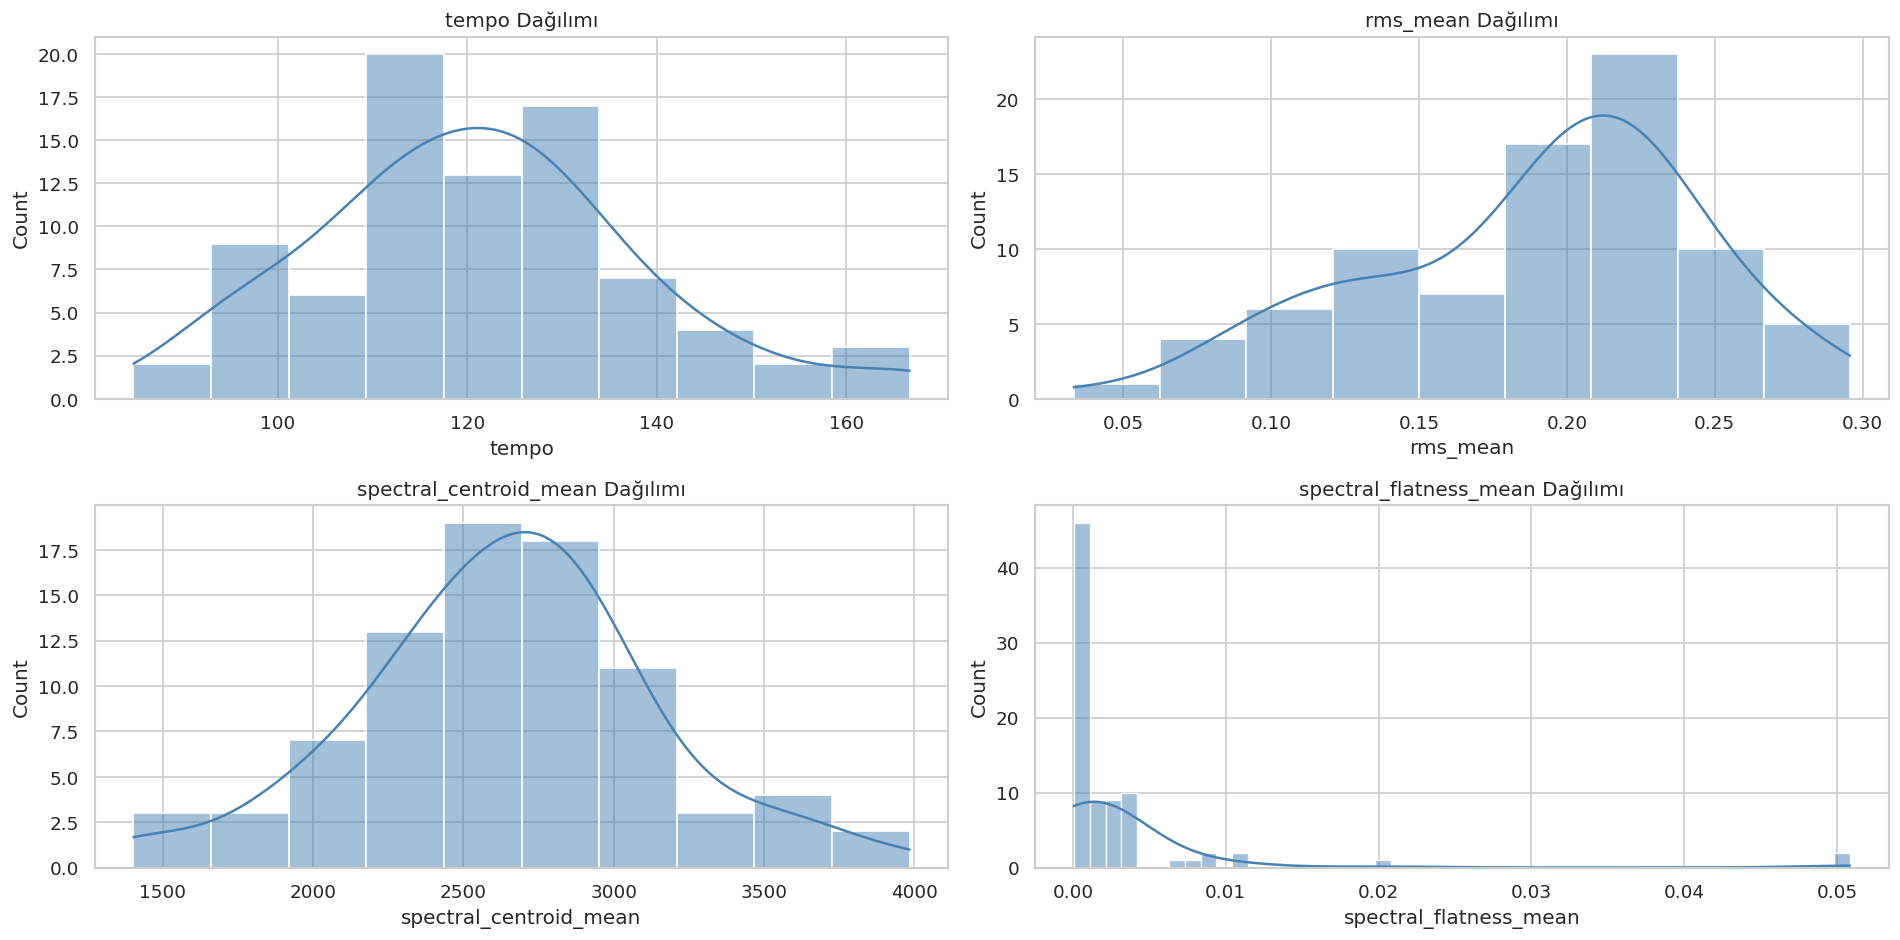

/tmp/ipython-input-4-3234072363.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='mode_label', palette='Set2')


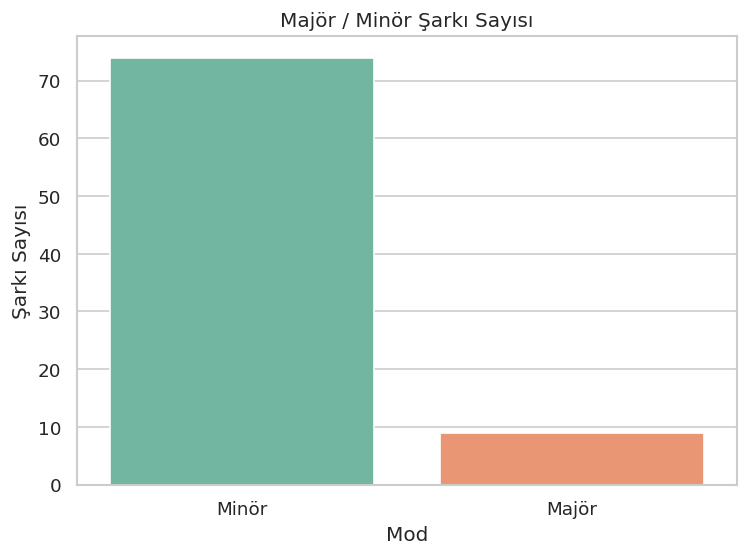

/tmp/ipython-input-4-3234072363.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mode_label', y='rms_mean', palette="pastel")


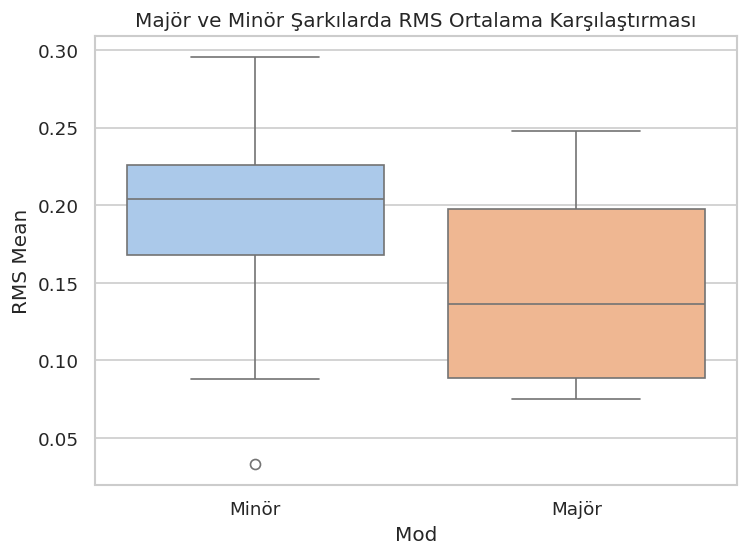

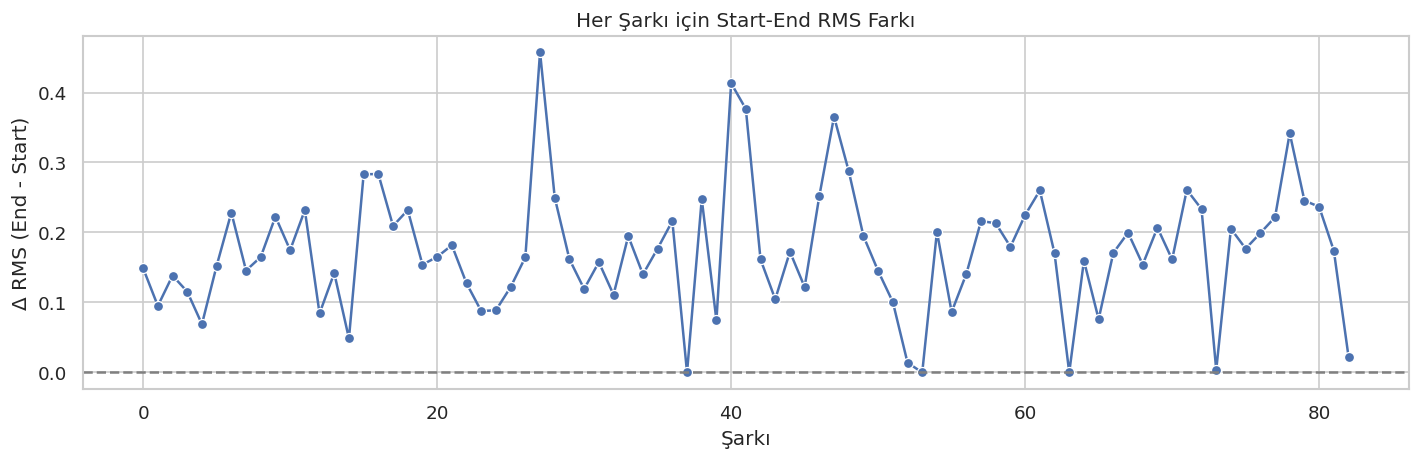

🔺 Yükselen şarkı sayısı: 81
🔻 Düşen şarkı sayısı: 2


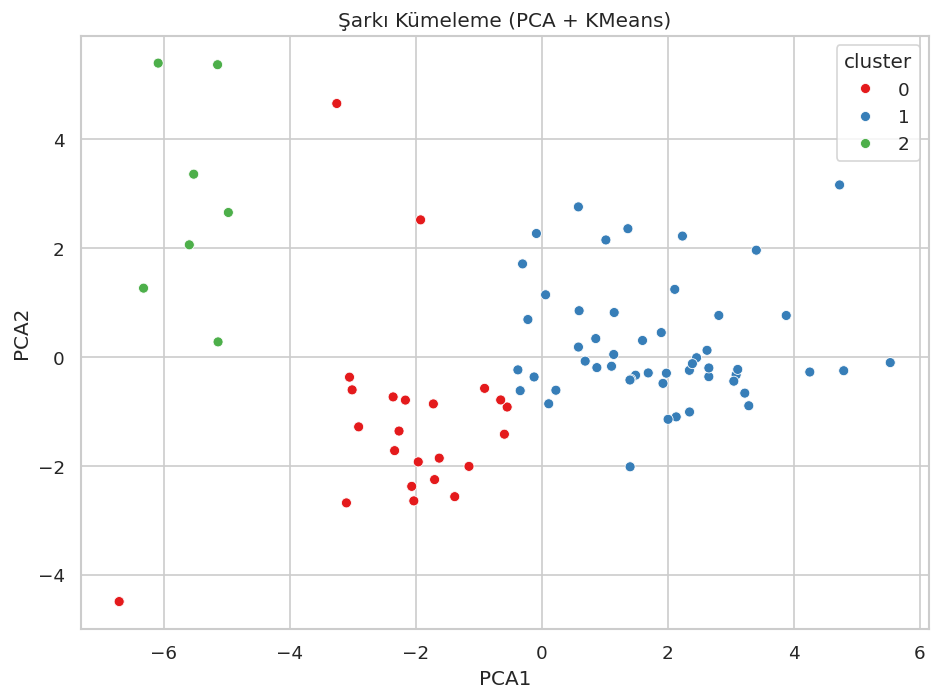

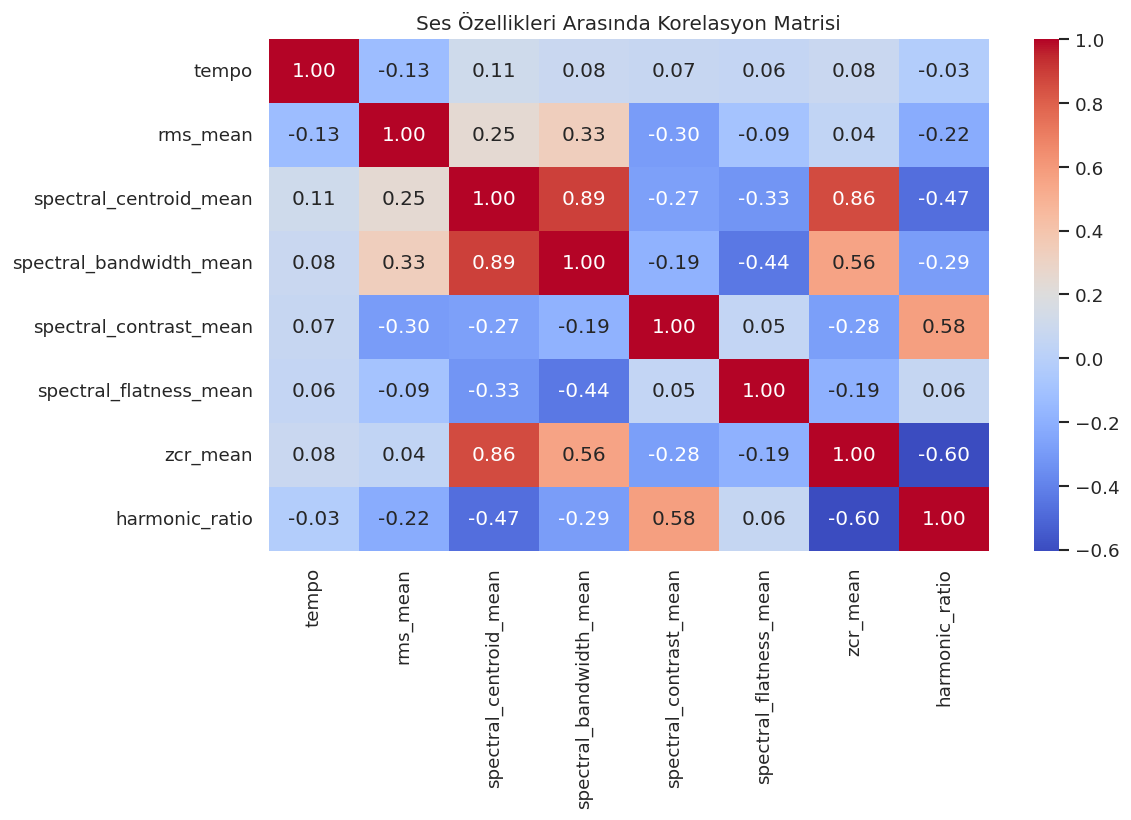

In [4]:
# 📦 GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 📌 AYARLAR
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# 📥 VERİYİ YÜKLE
df = pd.read_csv("/content/yalin_full_academic_audio_features2.csv")
df.columns = df.columns.str.strip()

# 🧹 TİP DÜZENLEMELER
df['tempo'] = df['tempo'].apply(lambda x: float(str(x).strip("[]")) if pd.notnull(x) else np.nan)
for col in ['duration_sec', 'start_rms', 'end_rms', 'tempo']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 📊 1. BETİMSEL ANALİZ & DAĞILIM
summary = df[['tempo', 'rms_mean', 'spectral_centroid_mean',
              'spectral_flatness_mean', 'spectral_contrast_mean']].describe().T
print("📈 Özet istatistikler:")
display(summary)

plt.figure(figsize=(16,8))
for i, col in enumerate(['tempo', 'rms_mean', 'spectral_centroid_mean', 'spectral_flatness_mean']):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f"{col} Dağılımı")
plt.tight_layout()
plt.show()

# 🎼 2. TONALİTE (MAJÖR/MİNÖR) ANALİZİ
df['mode_label'] = df['essentia_scale'].map({'major': 'Majör', 'minor': 'Minör'})

sns.countplot(data=df, x='mode_label', palette='Set2')
plt.title("Majör / Minör Şarkı Sayısı")
plt.xlabel("Mod")
plt.ylabel("Şarkı Sayısı")
plt.tight_layout()
plt.show()

sns.boxplot(data=df, x='mode_label', y='rms_mean', palette="pastel")
plt.title("Majör ve Minör Şarkılarda RMS Ortalama Karşılaştırması")
plt.xlabel("Mod")
plt.ylabel("RMS Mean")
plt.tight_layout()
plt.show()

# ⌛ 3. BAŞLANGIÇ - BİTİŞ RMS DİNAMİĞİ
df['delta_rms'] = df['end_rms'] - df['start_rms']

plt.figure(figsize=(12,4))
sns.lineplot(data=df, x=range(len(df)), y='delta_rms', marker="o")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Her Şarkı için Start-End RMS Farkı")
plt.xlabel("Şarkı")
plt.ylabel("Δ RMS (End - Start)")
plt.tight_layout()
plt.show()

yukselen = (df['delta_rms'] > 0).sum()
dusuk = (df['delta_rms'] <= 0).sum()
print(f"🔺 Yükselen şarkı sayısı: {yukselen}")
print(f"🔻 Düşen şarkı sayısı: {dusuk}")

# 🔍 4. KÜMELENDİRME (PCA + KMEANS)
features = [f'mfcc{i}_mean' for i in range(1, 21)] + [
    'tempo', 'rms_mean', 'spectral_centroid_mean', 'spectral_contrast_mean', 'spectral_flatness_mean']
data = df[features].dropna()

scaler = StandardScaler()
scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
plt.title("Şarkı Kümeleme (PCA + KMeans)")
plt.tight_layout()
plt.show()

# 📉 5. KORELASYON MATRİSİ
corr_cols = ['tempo', 'rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean',
             'spectral_contrast_mean', 'spectral_flatness_mean', 'zcr_mean', 'harmonic_ratio']

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ses Özellikleri Arasında Korelasyon Matrisi")
plt.tight_layout()
plt.show()


🎯 Duygu sınıfları dağılımı:
emotion_class
Pozitif-Enerjik    58
Negatif-Enerjik    25
Name: count, dtype: int64 

📊 DUYGU SINIFLANDIRMA BAŞARISI:

                 precision    recall  f1-score   support

Negatif-Enerjik       1.00      1.00      1.00         6
Pozitif-Enerjik       1.00      1.00      1.00        15

       accuracy                           1.00        21
      macro avg       1.00      1.00      1.00        21
   weighted avg       1.00      1.00      1.00        21


🔬 En önemli 10 öznitelik (duyguyu etkileyen):
tempo                     0.415171
spectral_contrast_mean    0.043074
spectral_flatness_mean    0.033247
mfcc17_mean               0.033162
mfcc4_mean                0.032551
mfcc5_mean                0.027935
mfcc15_mean               0.027475
mfcc8_mean                0.025977
mfcc10_mean               0.025782
mfcc19_mean               0.025553
dtype: float64 



/tmp/ipython-input-6-900804716.py:72: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


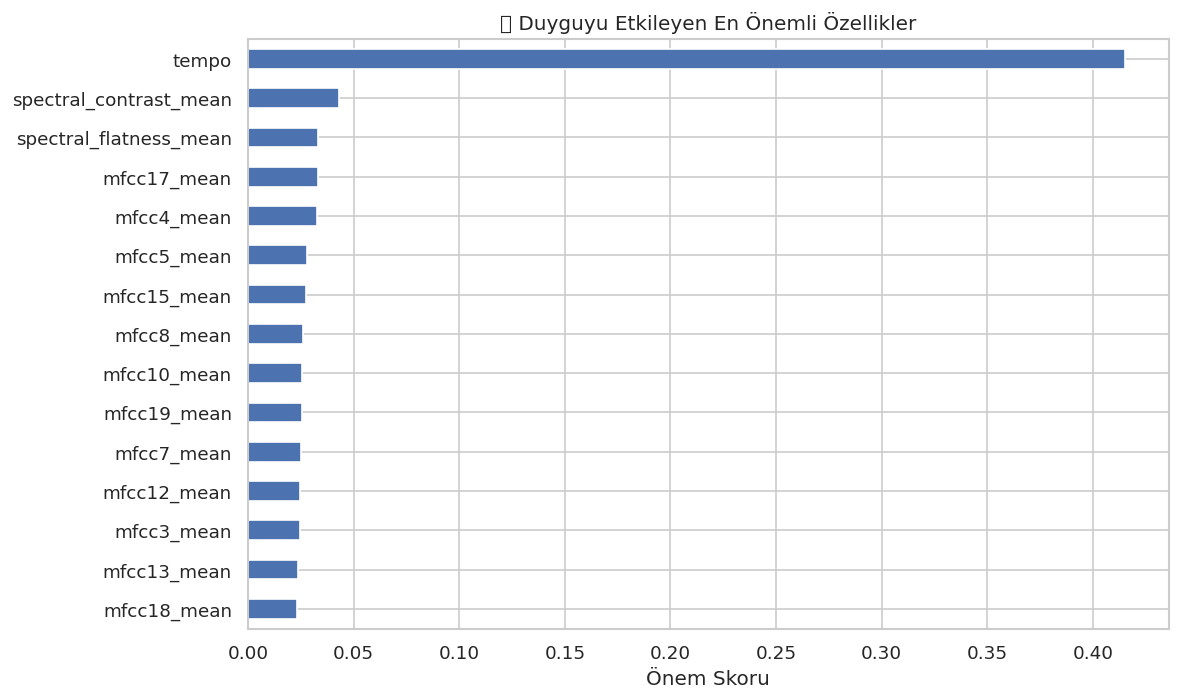

/tmp/ipython-input-6-900804716.py:86: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


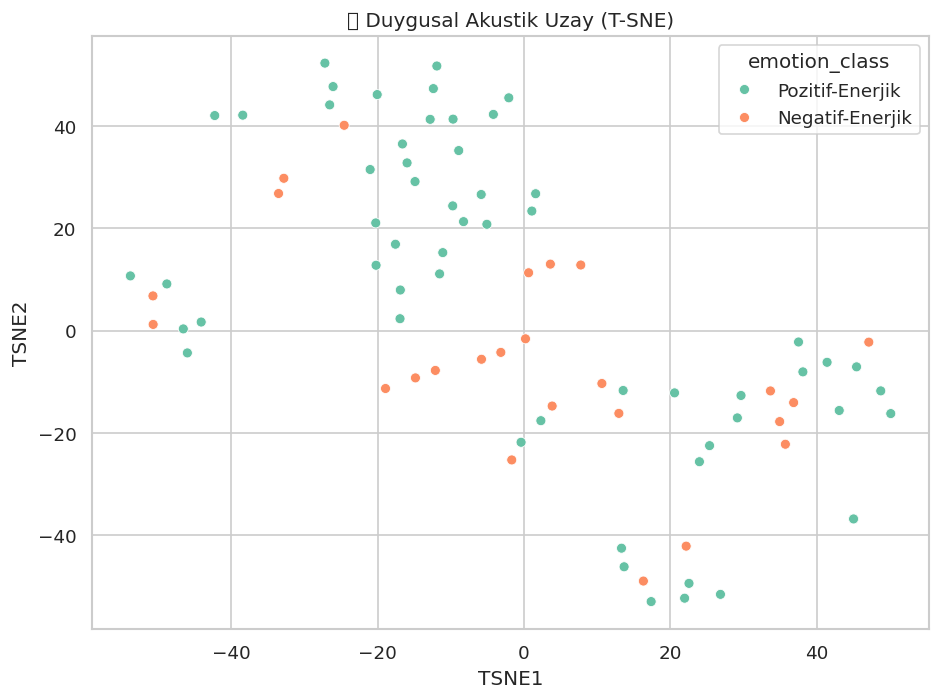

🎵 Stil kümeleri içinde şarkı sayıları:
Cluster
1    52
0    23
2     8
Name: count, dtype: int64 



/tmp/ipython-input-6-900804716.py:109: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


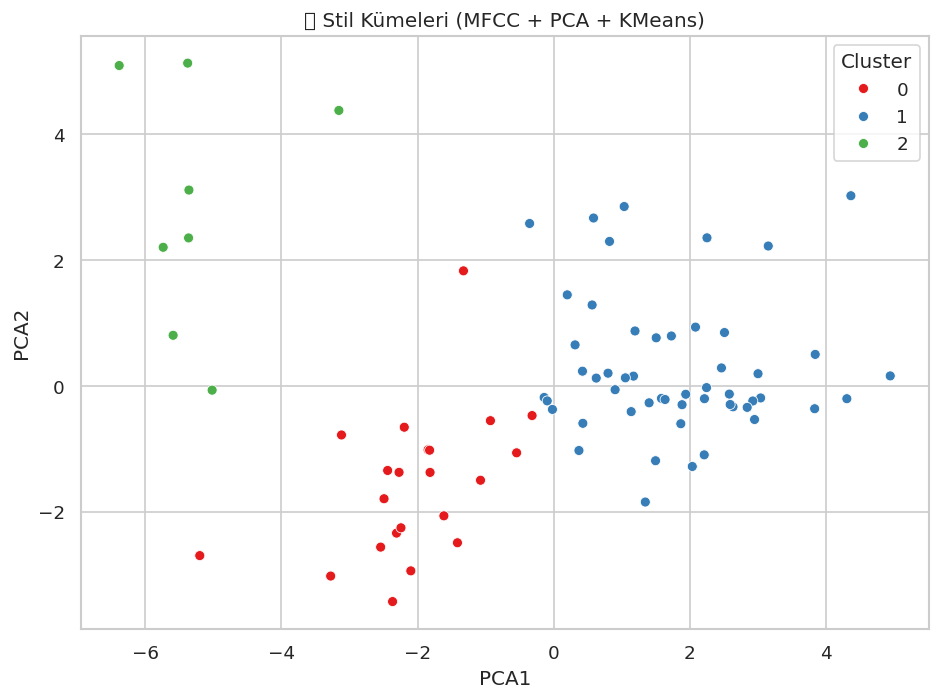

/tmp/ipython-input-6-900804716.py:119: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


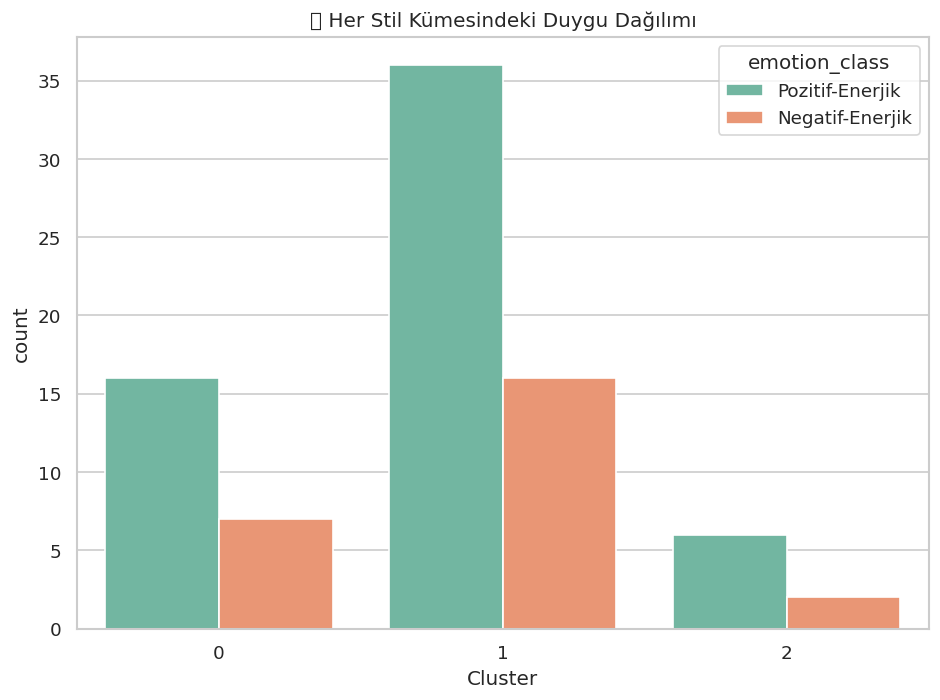

📊 Stil kümelerine göre duygu dağılım tablosu:
emotion_class  Negatif-Enerjik  Pozitif-Enerjik
Cluster                                        
0                            7               16
1                           16               36
2                            2                6


In [6]:
# 📦 KÜTÜPHANELER
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# 📥 VERİ YÜKLEME
df = pd.read_csv("/content/yalin_full_academic_audio_features2.csv")
df.columns = df.columns.str.strip()

# 🧹 TEMİZLEME
df['tempo'] = df['tempo'].apply(lambda x: float(str(x).strip("[]")) if pd.notnull(x) else np.nan)
for col in ['duration_sec', 'start_rms', 'end_rms', 'tempo', 'rms_mean']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🎯 1. DUYGU SINIFLARI
def emotion_label(row):
    if row['tempo'] > 110 and row['rms_mean'] > 0.03:
        return "Pozitif-Enerjik"
    elif row['tempo'] > 110:
        return "Pozitif-Sakin"
    elif row['rms_mean'] > 0.03:
        return "Negatif-Enerjik"
    else:
        return "Negatif-Sakin"
df['emotion_class'] = df.apply(emotion_label, axis=1)

print("🎯 Duygu sınıfları dağılımı:")
print(df['emotion_class'].value_counts(), "\n")

# 🧠 2. RANDOM FOREST İLE DUYGU TAHMİNİ
features = [f'mfcc{i}_mean' for i in range(1, 21)] + [
    'tempo', 'rms_mean', 'spectral_centroid_mean',
    'spectral_contrast_mean', 'spectral_flatness_mean'
]
data = df[features + ['emotion_class']].dropna()

X = data[features]
y = data['emotion_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("📊 DUYGU SINIFLANDIRMA BAŞARISI:\n")
print(classification_report(y_test, y_pred))

# 🔍 3. ÖZELLİK ÖNEMİ ANALİZİ
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

print("\n🔬 En önemli 10 öznitelik (duyguyu etkileyen):")
print(importances.head(10), "\n")

plt.figure(figsize=(10,6))
importances.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("🔬 Duyguyu Etkileyen En Önemli Özellikler")
plt.xlabel("Önem Skoru")
plt.tight_layout()
plt.show()

# 🌀 4. T-SNE İLE DUYGU UZAYI
scaled = StandardScaler().fit_transform(X)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_data = tsne.fit_transform(scaled)

df_tsne = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
df_tsne['emotion_class'] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='emotion_class', palette='Set2')
plt.title("🎨 Duygusal Akustik Uzay (T-SNE)")
plt.tight_layout()
plt.show()

# 🔗 5. K-MEANS İLE STİL KÜMELERİ
mfcc_cols = [f'mfcc{i}_mean' for i in range(1, 21)]
mfcc_data = df[mfcc_cols].dropna()
scaled_mfcc = StandardScaler().fit_transform(mfcc_data)

pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(scaled_mfcc)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_mfcc)

df_mfcc_pca = pd.DataFrame(mfcc_pca, columns=["PCA1", "PCA2"])
df_mfcc_pca['Cluster'] = clusters

print("🎵 Stil kümeleri içinde şarkı sayıları:")
print(df_mfcc_pca['Cluster'].value_counts(), "\n")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_mfcc_pca, x="PCA1", y="PCA2", hue="Cluster", palette="Set1")
plt.title("🎵 Stil Kümeleri (MFCC + PCA + KMeans)")
plt.tight_layout()
plt.show()

# 🧭 6. STİL x DUYGU İLİŞKİSİ
df_clustered = df_mfcc_pca.copy()
df_clustered['emotion_class'] = y.iloc[df_mfcc_pca.index].values

plt.figure(figsize=(8,6))
sns.countplot(data=df_clustered, x="Cluster", hue="emotion_class", palette="Set2")
plt.title("🎭 Her Stil Kümesindeki Duygu Dağılımı")
plt.tight_layout()
plt.show()

# Ayrıca çıktı olarak tablo verebiliriz
cluster_summary = df_clustered.groupby(['Cluster', 'emotion_class']).size().unstack(fill_value=0)
print("📊 Stil kümelerine göre duygu dağılım tablosu:")
print(cluster_summary)


🎯 Yeni duygu sınıfları dağılımı:
emotion_class
Pozitif-Enerjik    58
Negatif-Enerjik    25
Name: count, dtype: int64 

📊 DUYGU SINIFLANDIRMA BAŞARISI:

                 precision    recall  f1-score   support

Negatif-Enerjik       1.00      1.00      1.00         6
Pozitif-Enerjik       1.00      1.00      1.00        15

       accuracy                           1.00        21
      macro avg       1.00      1.00      1.00        21
   weighted avg       1.00      1.00      1.00        21

🔬 En önemli 10 öznitelik:

tempo                     0.415171
spectral_contrast_mean    0.043074
spectral_flatness_mean    0.033247
mfcc17_mean               0.033162
mfcc4_mean                0.032551
mfcc5_mean                0.027935
mfcc15_mean               0.027475
mfcc8_mean                0.025977
mfcc10_mean               0.025782
mfcc19_mean               0.025553
dtype: float64 



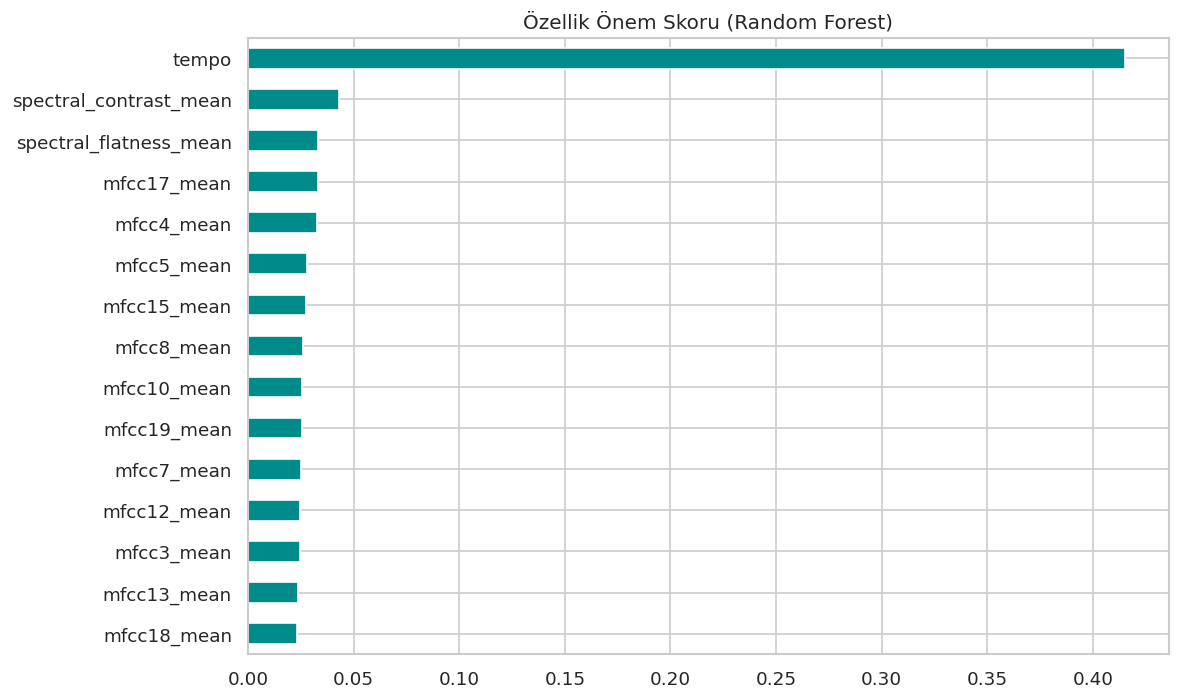

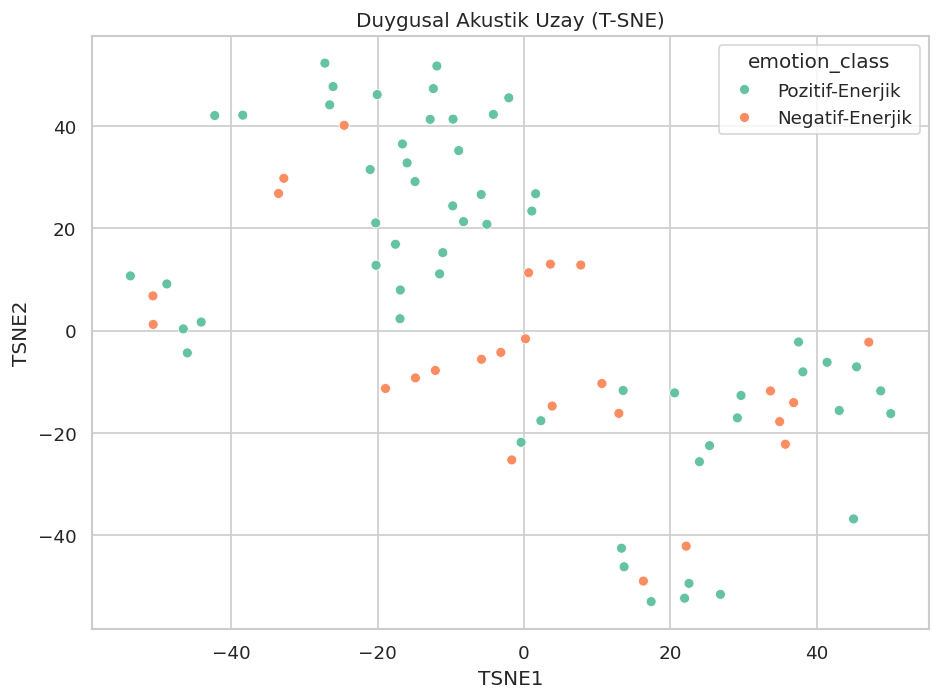


🎵 Stil kümeleri ve örnek şarkılar:
 - Küme 0 (23 şarkı): ['Yalin-Ask-Sebebim.mp3', 'Yalin-Miras-7.mp3', 'Yalin-Ben-Bilmem.mp3', 'Yalin-Oyunbaz-17.mp3', 'Yalin-O-Yaz-Bu-Yaz-61.mp3']
 - Küme 1 (52 şarkı): ['Yalin-Istanbul-Benden-Buyuk.mp3', 'Yalin-Nerden-Nereye.mp3', 'Yalin-Tek-Gecelik-Ask-Masali.mp3', 'Yalin-Yeniden.mp3', 'Yalin-Eyvahlar-Olsun.mp3']
 - Küme 2 (8 şarkı): ['Yalin-Meleklerin-Sozu-Var.mp3', 'Yalin-Ah-Be-Kardesim.mp3', 'Yalin-Terazi.mp3', 'Yalin-Askta-Telafi-Olmaz.mp3', 'Yalin-Ask-Ne-Demek.mp3']


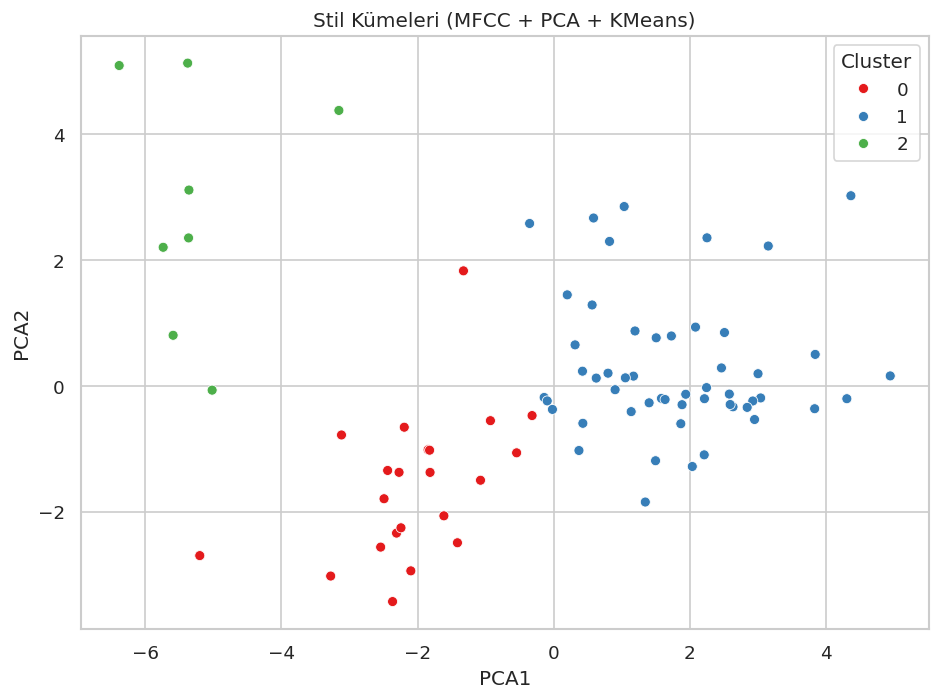

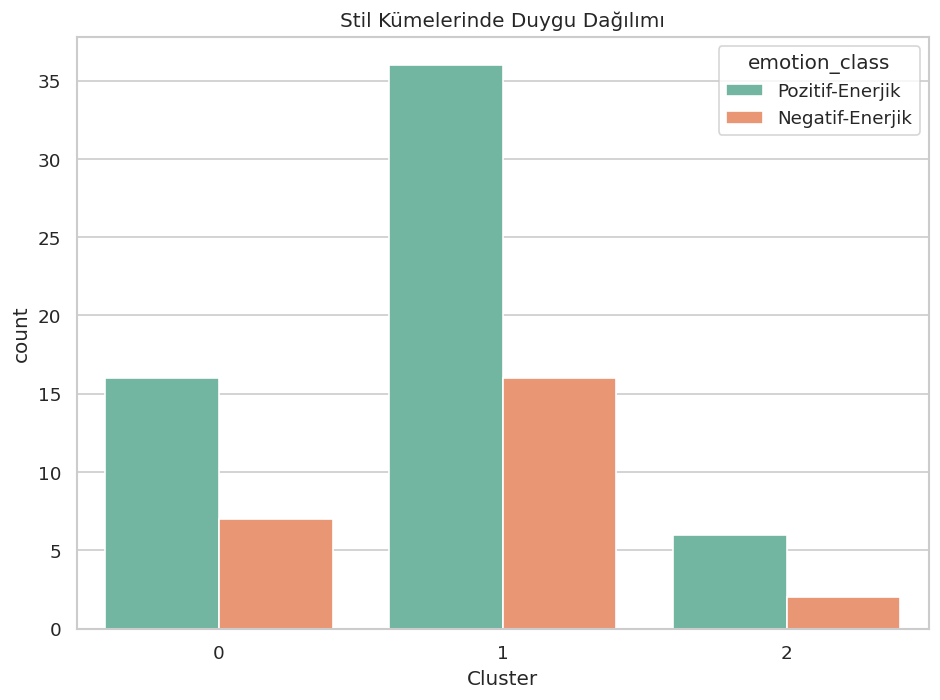


📊 Stil kümelerine göre duygu dağılım tablosu:
emotion_class  Negatif-Enerjik  Pozitif-Enerjik
Cluster                                        
0                            7               16
1                           16               36
2                            2                6


In [7]:
# 📦 KÜTÜPHANELER
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# 📥 VERİ YÜKLE
df = pd.read_csv("/content/yalin_full_academic_audio_features2.csv")
df.columns = df.columns.str.strip()

# 🧹 TEMİZLİK
df['tempo'] = df['tempo'].apply(lambda x: float(str(x).strip("[]")) if pd.notnull(x) else np.nan)
for col in ['duration_sec', 'start_rms', 'end_rms', 'tempo', 'rms_mean', 'spectral_flatness_mean']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🎯 DUYGU SINIFLANDIRMASI (iyileştirilmiş)
def emotion_label(row):
    if row['tempo'] > 110 and row['rms_mean'] > 0.03 and row['spectral_flatness_mean'] < 0.25:
        return "Pozitif-Enerjik"
    elif row['tempo'] <= 110 and row['rms_mean'] <= 0.03:
        return "Negatif-Sakin"
    elif row['rms_mean'] > 0.03:
        return "Negatif-Enerjik"
    else:
        return "Pozitif-Sakin"
df['emotion_class'] = df.apply(emotion_label, axis=1)

print("🎯 Yeni duygu sınıfları dağılımı:")
print(df['emotion_class'].value_counts(), "\n")

# 🧠 RANDOM FOREST MODELİ
features = [f'mfcc{i}_mean' for i in range(1, 21)] + [
    'tempo', 'rms_mean', 'spectral_centroid_mean',
    'spectral_contrast_mean', 'spectral_flatness_mean'
]
data = df[features + ['emotion_class']].dropna()

X = data[features]
y = data['emotion_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("📊 DUYGU SINIFLANDIRMA BAŞARISI:\n")
print(classification_report(y_test, y_pred))

# 🔍 ÖZELLİK ÖNEMİ GRAFİĞİ
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("🔬 En önemli 10 öznitelik:\n")
print(importances.head(10), "\n")

plt.figure(figsize=(10,6))
importances.head(15).plot(kind="barh", color='darkcyan')
plt.gca().invert_yaxis()
plt.title("Özellik Önem Skoru (Random Forest)")
plt.tight_layout()
plt.show()

# 🌀 T-SNE İLE DUYGU UZAYI
scaled = StandardScaler().fit_transform(X)
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_data = tsne.fit_transform(scaled)

df_tsne = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
df_tsne['emotion_class'] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='emotion_class', palette='Set2')
plt.title("Duygusal Akustik Uzay (T-SNE)")
plt.tight_layout()
plt.show()

# 🔗 K-MEANS İLE STİL KÜMELERİ (MFCC tabanlı)
mfcc_cols = [f'mfcc{i}_mean' for i in range(1, 21)]
mfcc_data = df[['filename'] + mfcc_cols].dropna()
scaled_mfcc = StandardScaler().fit_transform(mfcc_data[mfcc_cols])

pca = PCA(n_components=2)
mfcc_pca = pca.fit_transform(scaled_mfcc)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_mfcc)

df_mfcc_pca = pd.DataFrame(mfcc_pca, columns=["PCA1", "PCA2"])
df_mfcc_pca['Cluster'] = clusters
df_mfcc_pca['filename'] = mfcc_data['filename'].values

# Küme örnek şarkıları yazdır
print("\n🎵 Stil kümeleri ve örnek şarkılar:")
for c in sorted(df_mfcc_pca['Cluster'].unique()):
    example_songs = df_mfcc_pca[df_mfcc_pca['Cluster'] == c]['filename'].head(5).tolist()
    print(f" - Küme {c} ({len(df_mfcc_pca[df_mfcc_pca['Cluster'] == c])} şarkı): {example_songs}")

# Küme haritası
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_mfcc_pca, x="PCA1", y="PCA2", hue="Cluster", palette="Set1")
plt.title("Stil Kümeleri (MFCC + PCA + KMeans)")
plt.tight_layout()
plt.show()

# STİL x DUYGU ANALİZİ
# Duygu sınıfını da bağla
df_mfcc_pca['emotion_class'] = df.loc[df_mfcc_pca.index, 'emotion_class'].values

plt.figure(figsize=(8,6))
sns.countplot(data=df_mfcc_pca, x="Cluster", hue="emotion_class", palette="Set2")
plt.title("Stil Kümelerinde Duygu Dağılımı")
plt.tight_layout()
plt.show()

# Tablo halinde
style_emotion_table = df_mfcc_pca.groupby(['Cluster', 'emotion_class']).size().unstack(fill_value=0)
print("\n📊 Stil kümelerine göre duygu dağılım tablosu:")
print(style_emotion_table)


In [8]:
# 📦 GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

# 📥 VERİ YÜKLE
df = pd.read_csv("/content/yalin_full_academic_audio_features2.csv")
df.columns = df.columns.str.strip()

# 🧹 TEMİZLEME
df['tempo'] = df['tempo'].apply(lambda x: float(str(x).strip("[]")) if pd.notnull(x) else np.nan)
for col in ['tempo', 'rms_mean', 'spectral_flatness_mean', 'spectral_centroid_mean', 'librosa_key_strength']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 🎯 1. VALENCE SCORE (duygu skoru) oluştur
def compute_valence(row):
    return (
        0.4 * row.get('tempo', 0) +
        0.3 * row.get('spectral_centroid_mean', 0) -
        0.2 * row.get('spectral_flatness_mean', 0) +
        0.1 * row.get('librosa_key_strength', 0)
    )

df['valence_score'] = df.apply(compute_valence, axis=1)
df['valence_class'] = pd.qcut(df['valence_score'], q=2, labels=['Low_Valence', 'High_Valence'])

# 🎯 2. ÖZELLİK SEÇİMİ (MFCC + spektral)
features = [f'mfcc{i}_mean' for i in range(1, 21)] + [
    'tempo', 'rms_mean', 'spectral_centroid_mean',
    'spectral_contrast_mean', 'spectral_flatness_mean', 'librosa_key_strength'
]
data = df[features + ['valence_class']].dropna()
X = data[features]
y = data['valence_class']

# 🔍 STANDARTLAŞTIRMA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔧 3. Recursive Feature Elimination (RFE) → En iyi 10 özellik
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(X_scaled, y)
selected_features = list(X.columns[rfe.support_])
X_selected = X[selected_features]

# 🔀 4. EĞİTİM VE TEST AYRIMI
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify=y, random_state=42)

# 🧠 5. MODEL KARŞILAŞTIRMASI
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

print("🎯 Seçilen en iyi 10 özellik:")
print(selected_features, "\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🔍 Model: {name}")
    print(classification_report(y_test, preds))


🎯 Seçilen en iyi 10 özellik:
['mfcc1_mean', 'mfcc2_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc15_mean', 'mfcc17_mean', 'spectral_centroid_mean'] 


🔍 Model: Random Forest
              precision    recall  f1-score   support

High_Valence       0.83      1.00      0.91        10
 Low_Valence       1.00      0.82      0.90        11

    accuracy                           0.90        21
   macro avg       0.92      0.91      0.90        21
weighted avg       0.92      0.90      0.90        21


🔍 Model: Logistic Regression
              precision    recall  f1-score   support

High_Valence       0.89      0.80      0.84        10
 Low_Valence       0.83      0.91      0.87        11

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21


🔍 Model: SVM
              precision    recall  f1-score   support

High_Valence       0.91      1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
